INF6804 Vision par ordinateur

Polytechnique Montréal

Calcul du flot optique

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

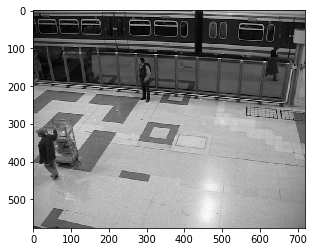

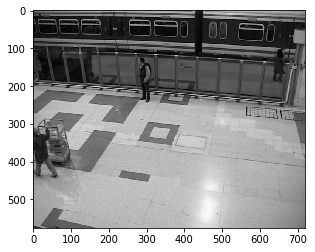

In [35]:
image1 = (cv2.imread('in000235.jpg',cv2.IMREAD_GRAYSCALE))
plt.imshow(image1, cmap = plt.get_cmap('gray'))
plt.show()
image2 = (cv2.imread('in000240.jpg',cv2.IMREAD_GRAYSCALE))
plt.imshow(image2, cmap = plt.get_cmap('gray'))
plt.show()

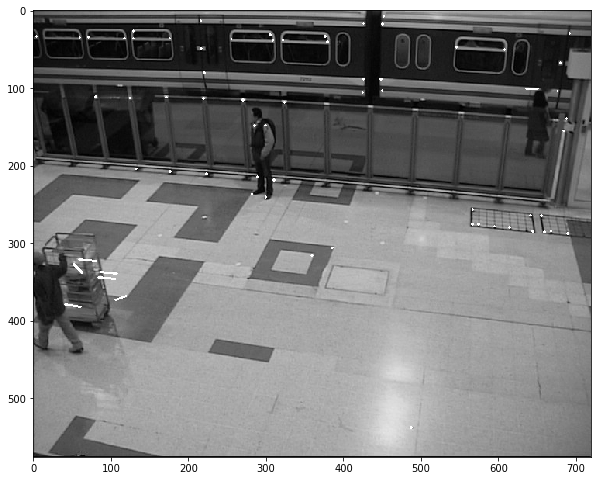

In [36]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

p0 = cv2.goodFeaturesToTrack(image1, mask = None, **feature_params)
p1, st, err = cv2.calcOpticalFlowPyrLK(image1, image2, p0, None, **lk_params)

good_new = p1[st==1]
good_old = p0[st==1]
# draw the tracks
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    image2 = cv2.line(image2, (a,b),(c,d), [255,255,255], 2)
    #image2 = cv2.circle(image2,(a,b),1,[255,255,255],-1)
plt.figure(1,(10,10))
plt.imshow(image2,cmap = plt.get_cmap('gray'))
plt.show()